In [1]:
import numpy as np
from numpy import fft
from itertools import chain, zip_longest
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina' # higher res notebook output

The block below sets up wavenumbers `k`, the Laplacian in Fourier space `L`, and the data that I will apply the filter to `f0`. 

The data is constructed so that the DFT of the data is 1 for all wavenumbers. Once we've applied the filter, if we compute and plot the absolute value of the FFT of `f` then what we see is the effective filter shape.

In [2]:
%matplotlib inline
k = np.concatenate([np.arange(0,129), np.arange(-127,0)])
L = - k**2
fHat = np.exp(1j*np.random.uniform(0,2*np.pi,256))
f0 = fft.ifft(fHat)
n_steps = 128
fftshift = np.argsort(k)

In [3]:
fIncreasing = np.zeros((256,128))
fDecreasing = np.zeros((256,128))
fAlternating= np.zeros((256,128))

# First compute the stages arranged from most-amplifying to most-damping
s = (np.arange(43,n_steps+43))**2
for j in range(n_steps):
    f = f0
    for i in range(j):
        fHat = fft.fft(f)
        f = fft.ifft(fHat + (1/s[i])*L*fHat)
    fIncreasing[:,j] = np.abs(fft.fft(f))[fftshift]
    
# Next compute the stages arranged from most-amplifying to most-damping
s = -np.sort(-(np.arange(43,n_steps+43))**2)
for j in range(n_steps):
    f = f0
    for i in range(j):
        fHat = fft.fft(f)
        f = fft.ifft(fHat + (1/s[i])*L*fHat)
    fDecreasing[:,j] = np.abs(fft.fft(f))[fftshift]

# Next plot the stages alternating most-amplifying to most-damping
ind = np.argsort(np.abs(1 - 128**2/s))
s = s[ind] # sorted from most damping to most amplifying
indD = np.argwhere(np.abs(1 - 128**2/s)<=1)
indA = np.argwhere(np.abs(1 - 128**2/s)>1)
sD = s[indD].tolist() # Damping roots, sorted most to least damping
sA = np.flip(s[indA]).tolist() # Amplifying roots, sorted most to least amplifying
s = [x for x in chain(*zip_longest(sD,sA)) if x is not None]
s = np.array([y for x in s for y in x])
for j in range(n_steps):
    f = f0
    for i in range(j):
        fHat = fft.fft(f)
        f = fft.ifft(fHat + (1/s[i])*L*fHat)
    fAlternating[:,j] = np.abs(fft.fft(f))[fftshift]

/glade/u/apps/dav/opt/python/3.7.9/gnu/9.1.0/pkg-library/20201220/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log10
  This is separate from the ipykernel package so we can avoid doing imports until
/glade/u/apps/dav/opt/python/3.7.9/gnu/9.1.0/pkg-library/20201220/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in log10
  
/glade/u/apps/dav/opt/python/3.7.9/gnu/9.1.0/pkg-library/20201220/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in log10
  del sys.path[0]


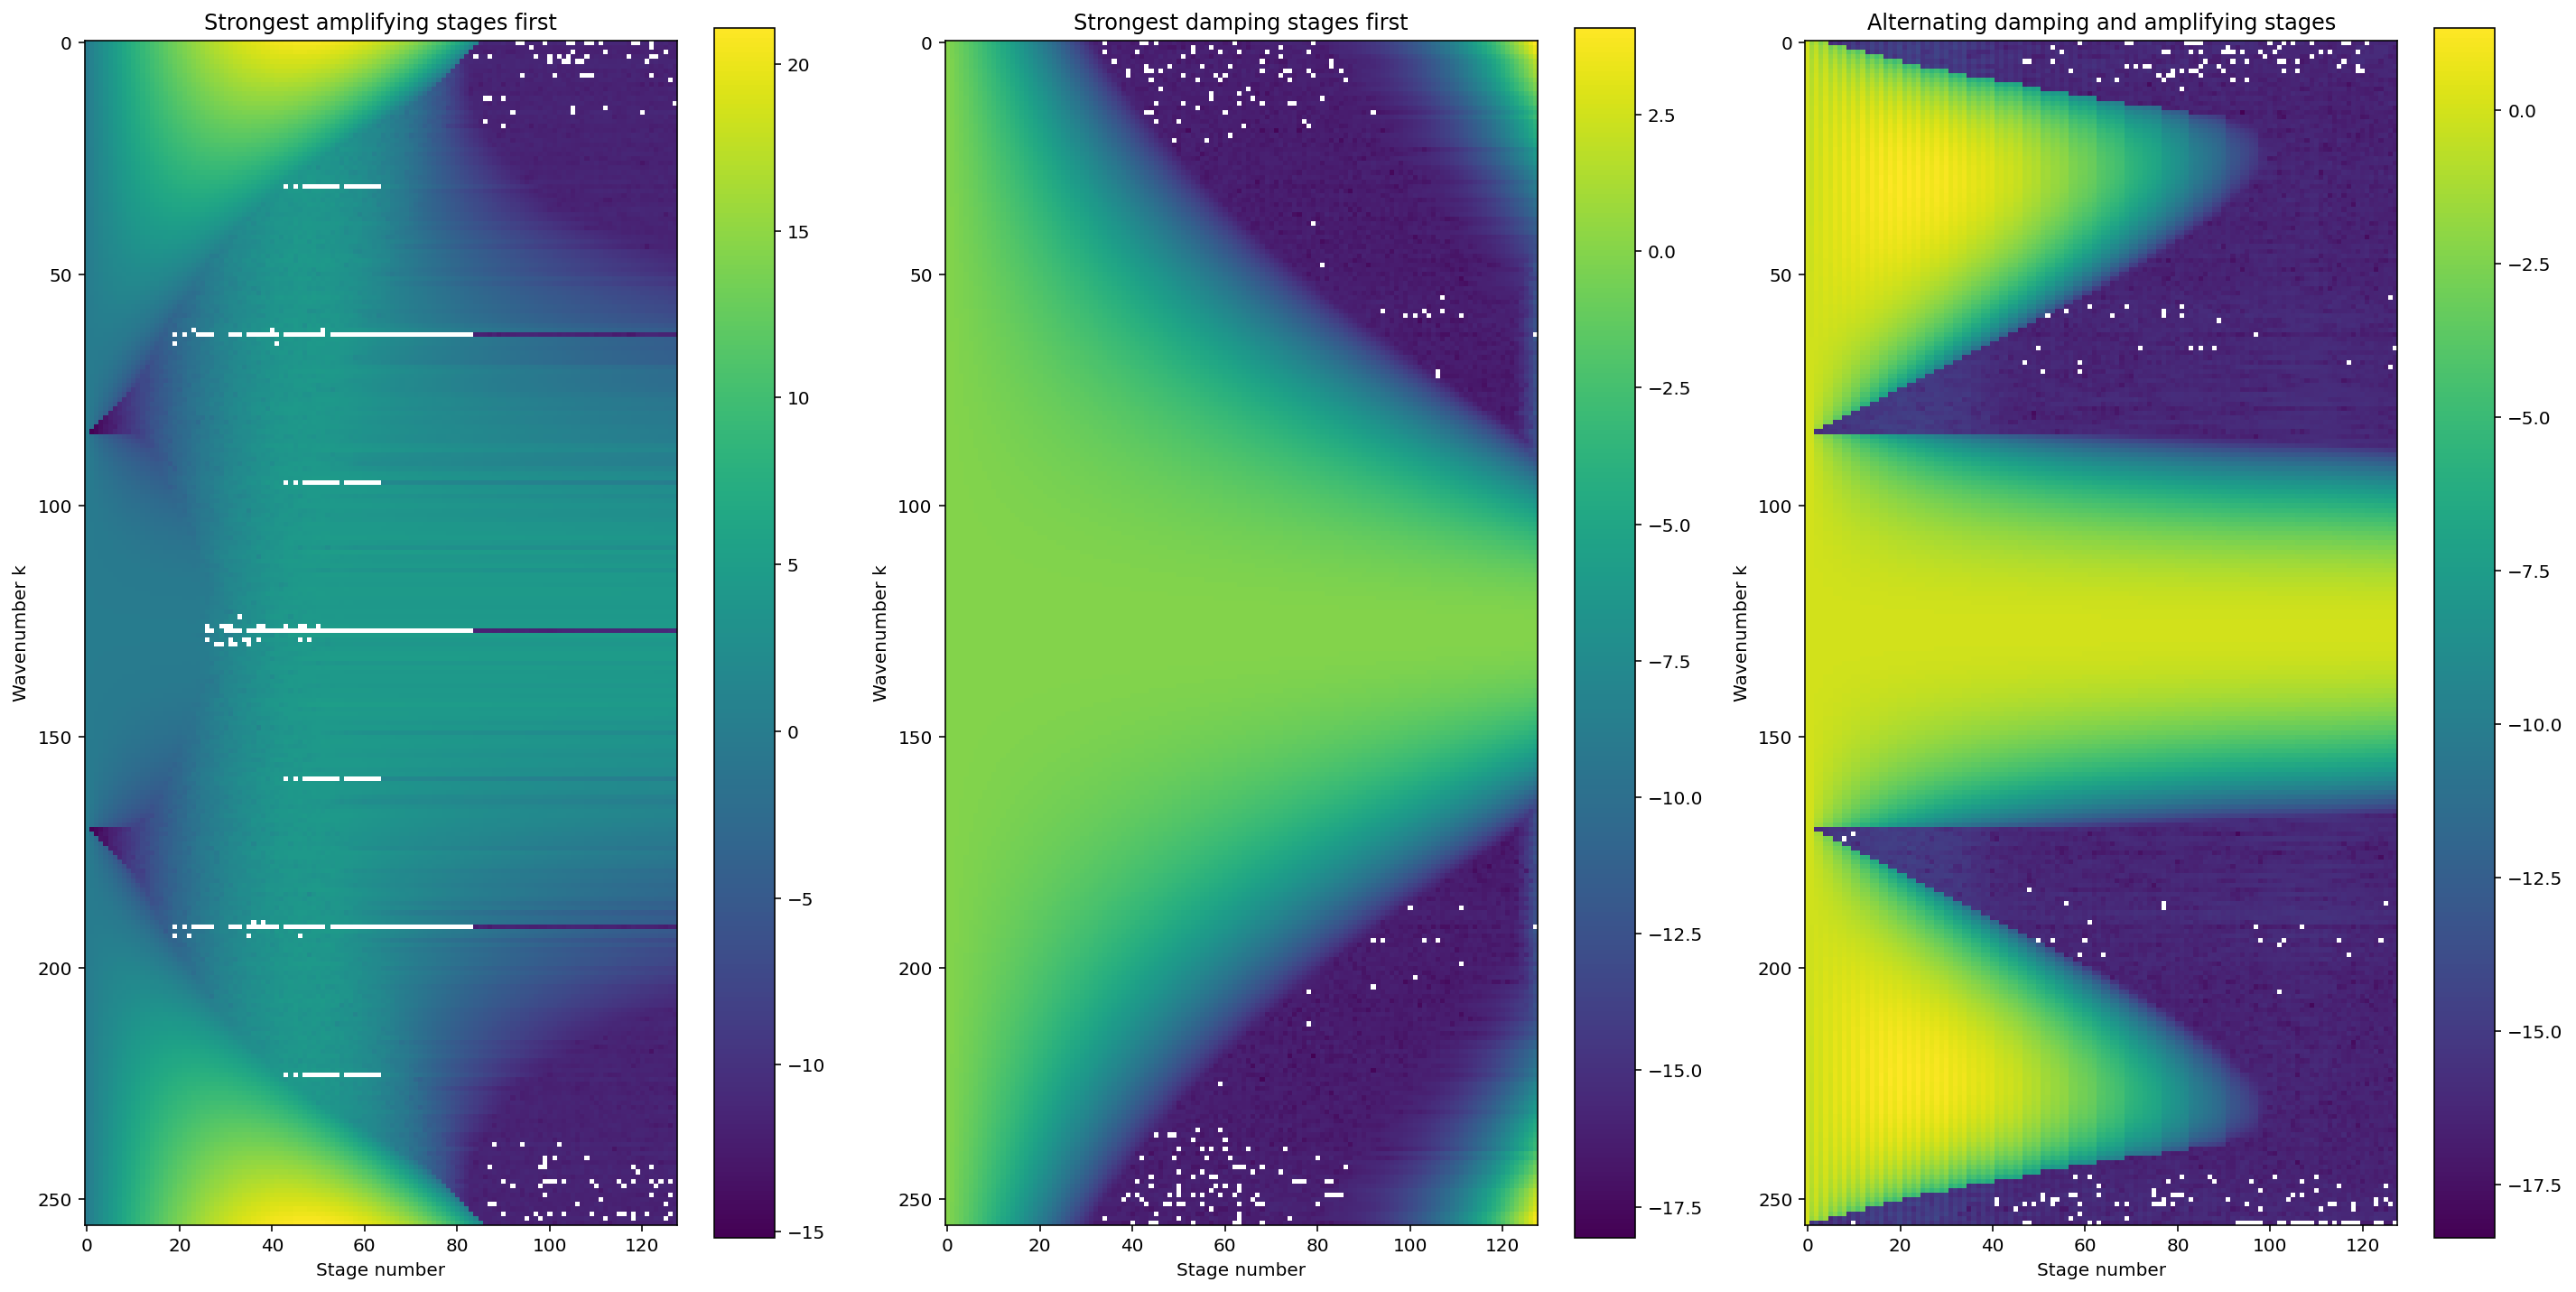

In [4]:
fig, axarr = plt.subplots(ncols=3, nrows=1, figsize=[20,10])

im0 = axarr[0].imshow(np.log10(fIncreasing))
axarr[0].set_xlabel('Stage number')
axarr[0].set_ylabel('Wavenumber k')
axarr[0].set_title('Strongest amplifying stages first')
fig.colorbar(im0,ax=axarr[0])
im1 = axarr[1].imshow(np.log10(fDecreasing))
axarr[1].set_xlabel('Stage number')
axarr[1].set_ylabel('Wavenumber k')
axarr[1].set_title('Strongest damping stages first')
fig.colorbar(im1,ax=axarr[1])
im2 = axarr[2].imshow(np.log10(fAlternating))
axarr[2].set_xlabel('Stage number')
axarr[2].set_ylabel('Wavenumber k')
axarr[2].set_title('Alternating damping and amplifying stages')
fig.colorbar(im2,ax=axarr[2])

plt.tight_layout()

/glade/u/apps/dav/opt/python/3.7.9/gnu/9.1.0/pkg-library/20201220/lib/python3.7/site-packages/ipykernel_launcher.py:12: MatplotlibDeprecationWarning: default base will change from np.e to 10 in 3.4.  To suppress this warning specify the base keyword argument.
  if sys.path[0] == '':
/glade/u/apps/dav/opt/python/3.7.9/gnu/9.1.0/pkg-library/20201220/lib/python3.7/site-packages/ipykernel_launcher.py:12: MatplotlibDeprecationWarning: Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.
  if sys.path[0] == '':
/glade/u/apps/dav/opt/python/3.7.9/gnu/9.1.0/pkg-library/20201220/lib/python3.7/site-packages/ipykernel_launcher.py:17: MatplotlibDeprecationWarning: default base will change from np.e to 10 in 3.4.  To suppress this warning specify the base keyword argument.
/glade/u/apps/dav/opt/python/3.7.9/gnu/9.1.0/pkg-library/20201220/lib/python3.7/site-packages

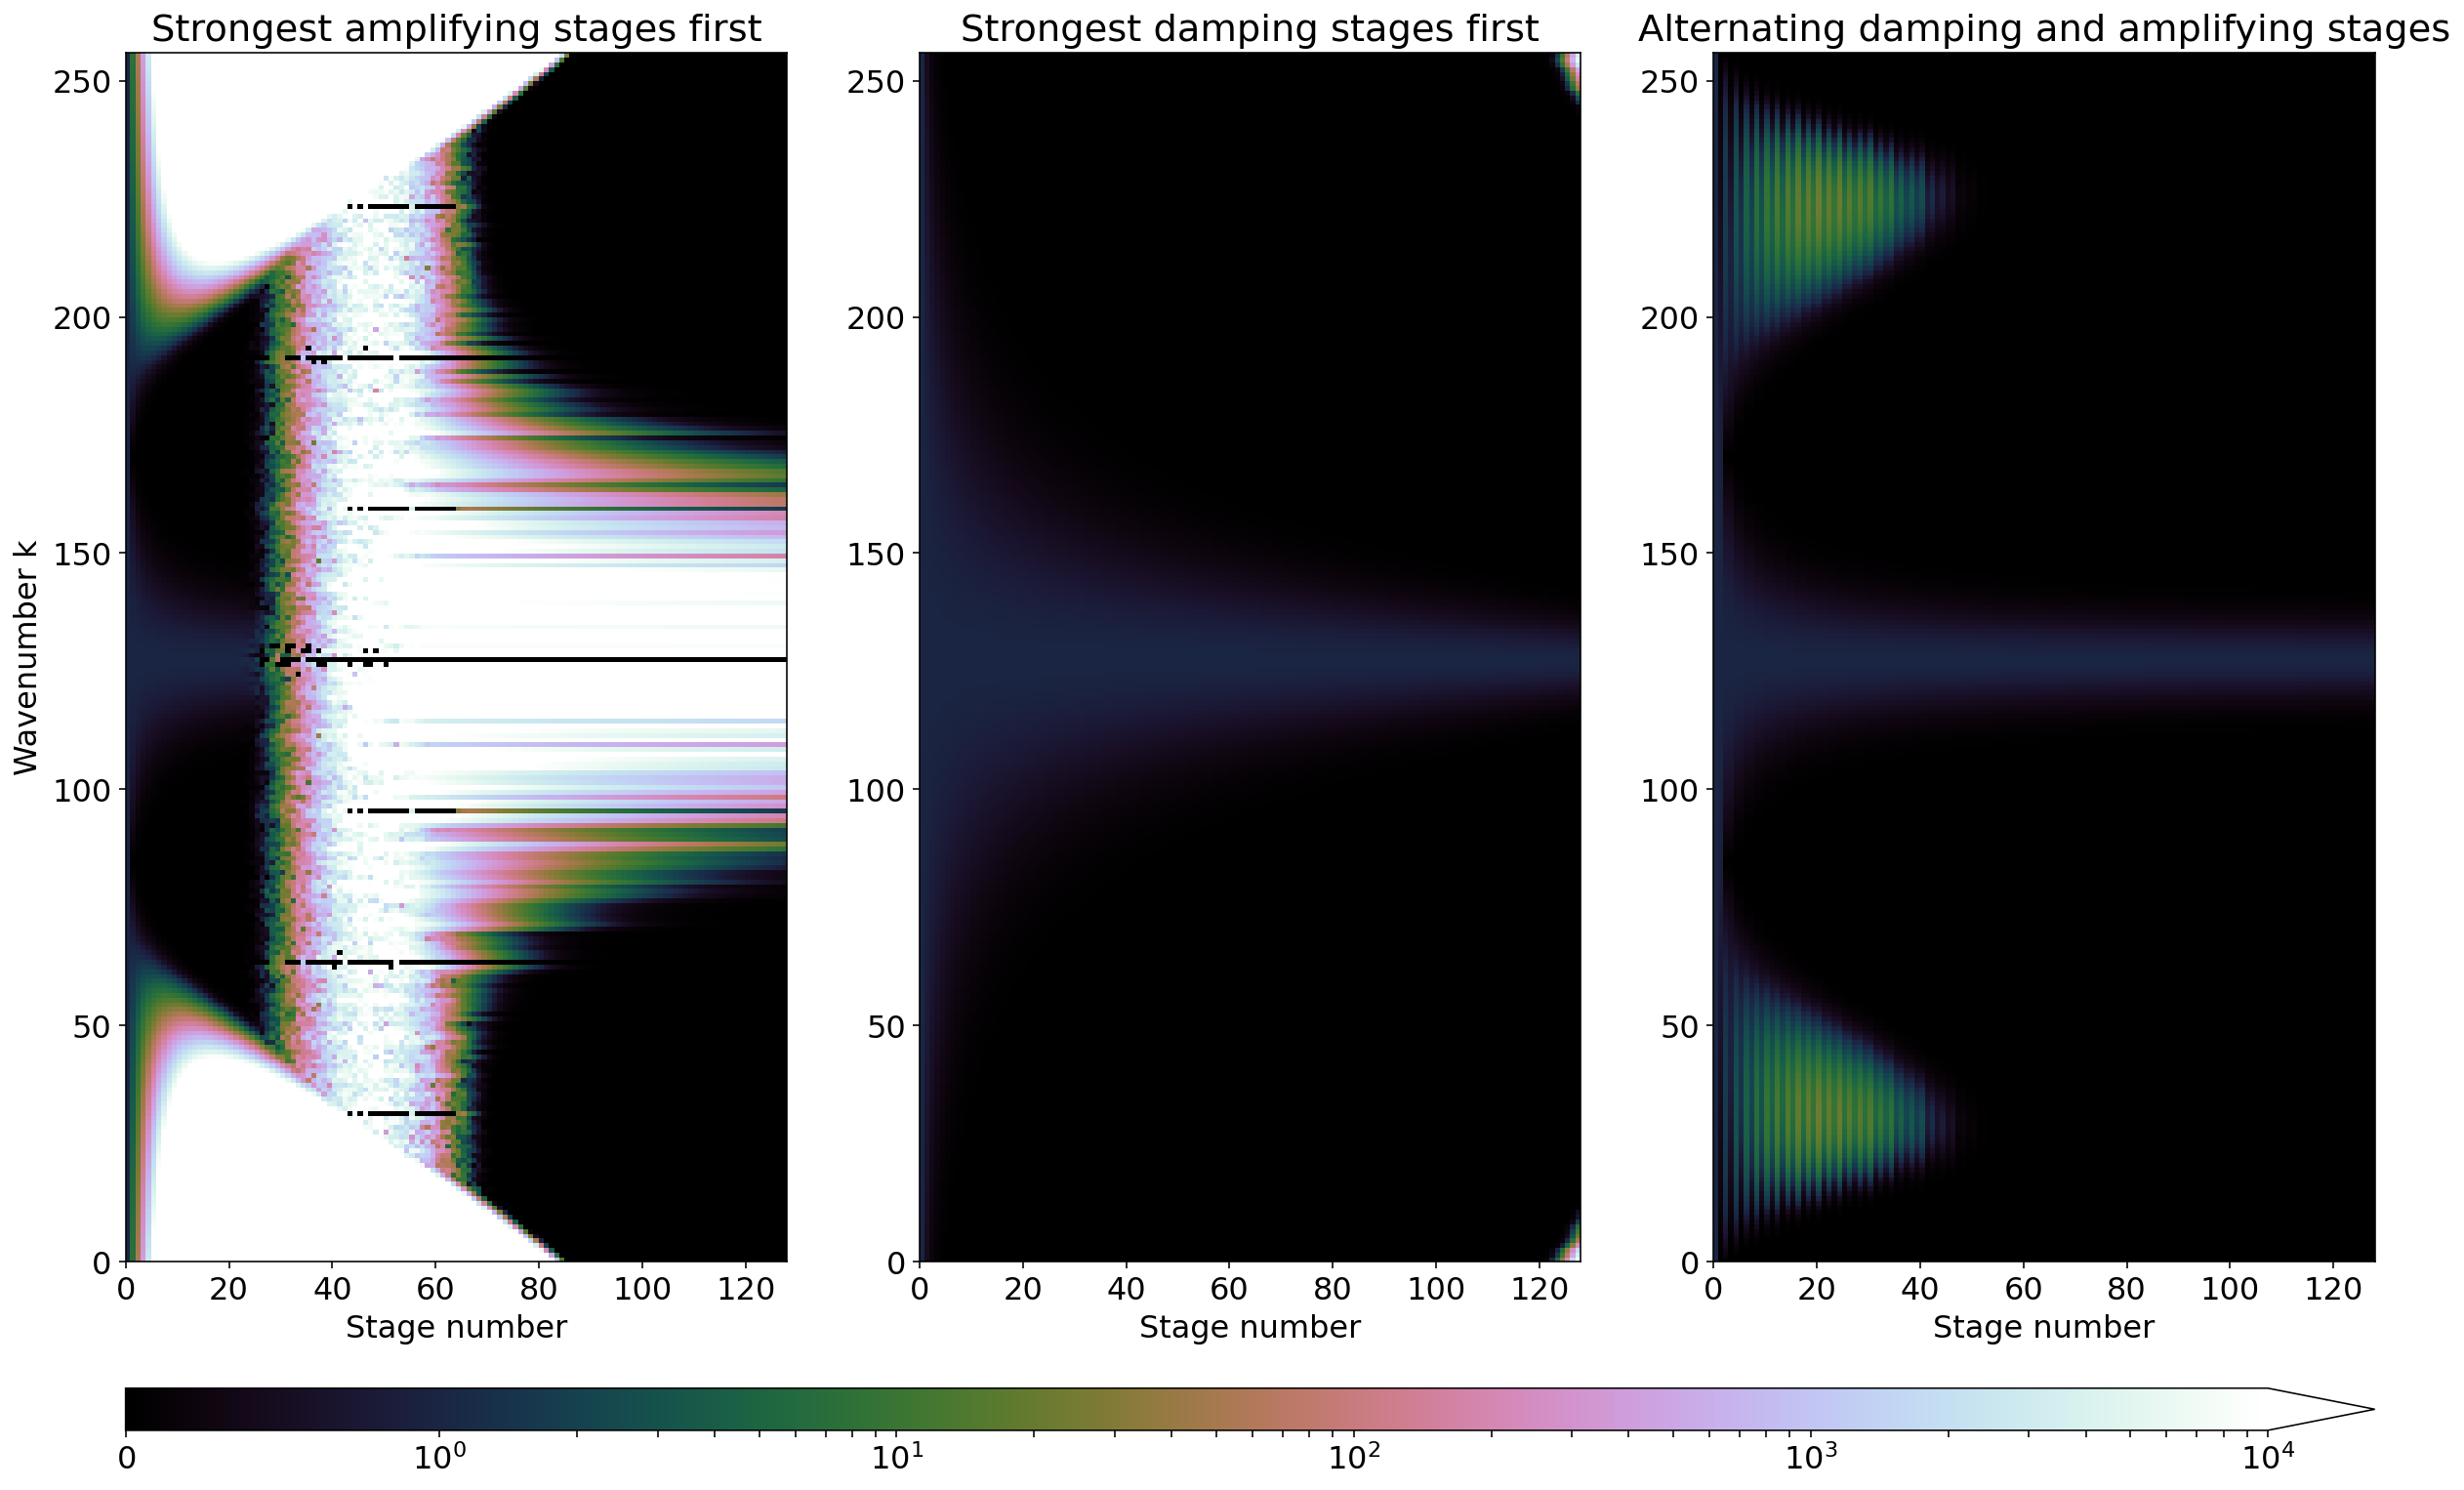

In [56]:
import matplotlib as mpl
import matplotlib.pylab as pylab
params = {'font.size': 16}
pylab.rcParams.update(params)
cmap = 'cubehelix'
vmax = 1e4

fig, axarr = plt.subplots(ncols=3, nrows=1, figsize=[20,10])

im0 = axarr[0].pcolormesh(fIncreasing, cmap=cmap, norm=mpl.colors.SymLogNorm(linthresh=1), vmax=vmax)
axarr[0].set_xlabel('Stage number')
axarr[0].set_ylabel('Wavenumber k')
axarr[0].set_title('Strongest amplifying stages first')

im1 = axarr[1].pcolormesh(fDecreasing, cmap=cmap, norm=mpl.colors.SymLogNorm(linthresh=1), vmax=vmax)
axarr[1].set_xlabel('Stage number')
#axarr[1].set_ylabel('Wavenumber k')
axarr[1].set_title('Strongest damping stages first')

im2 = axarr[2].pcolormesh(fAlternating, cmap=cmap, norm=mpl.colors.SymLogNorm(linthresh=1), vmax=vmax)
axarr[2].set_xlabel('Stage number')
#axarr[2].set_ylabel('Wavenumber k')
axarr[2].set_title('Alternating damping and amplifying stages')

# colorbar
fig.subplots_adjust(left=0.1, bottom=0.02)
cax = fig.add_axes([0.1, -0.1, 0.8, 0.03])
cbar = fig.colorbar(im0, cax=cax, orientation='horizontal',extend='max')

#plt.savefig('figures/instability_cubehelix.png',dpi=400,bbox_inches='tight',pad_inches=0)

/glade/u/apps/dav/opt/python/3.7.9/gnu/9.1.0/pkg-library/20201220/lib/python3.7/site-packages/ipykernel_launcher.py:12: MatplotlibDeprecationWarning: default base will change from np.e to 10 in 3.4.  To suppress this warning specify the base keyword argument.
  if sys.path[0] == '':
/glade/u/apps/dav/opt/python/3.7.9/gnu/9.1.0/pkg-library/20201220/lib/python3.7/site-packages/ipykernel_launcher.py:12: MatplotlibDeprecationWarning: Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.
  if sys.path[0] == '':
/glade/u/apps/dav/opt/python/3.7.9/gnu/9.1.0/pkg-library/20201220/lib/python3.7/site-packages/ipykernel_launcher.py:17: MatplotlibDeprecationWarning: default base will change from np.e to 10 in 3.4.  To suppress this warning specify the base keyword argument.
/glade/u/apps/dav/opt/python/3.7.9/gnu/9.1.0/pkg-library/20201220/lib/python3.7/site-packages

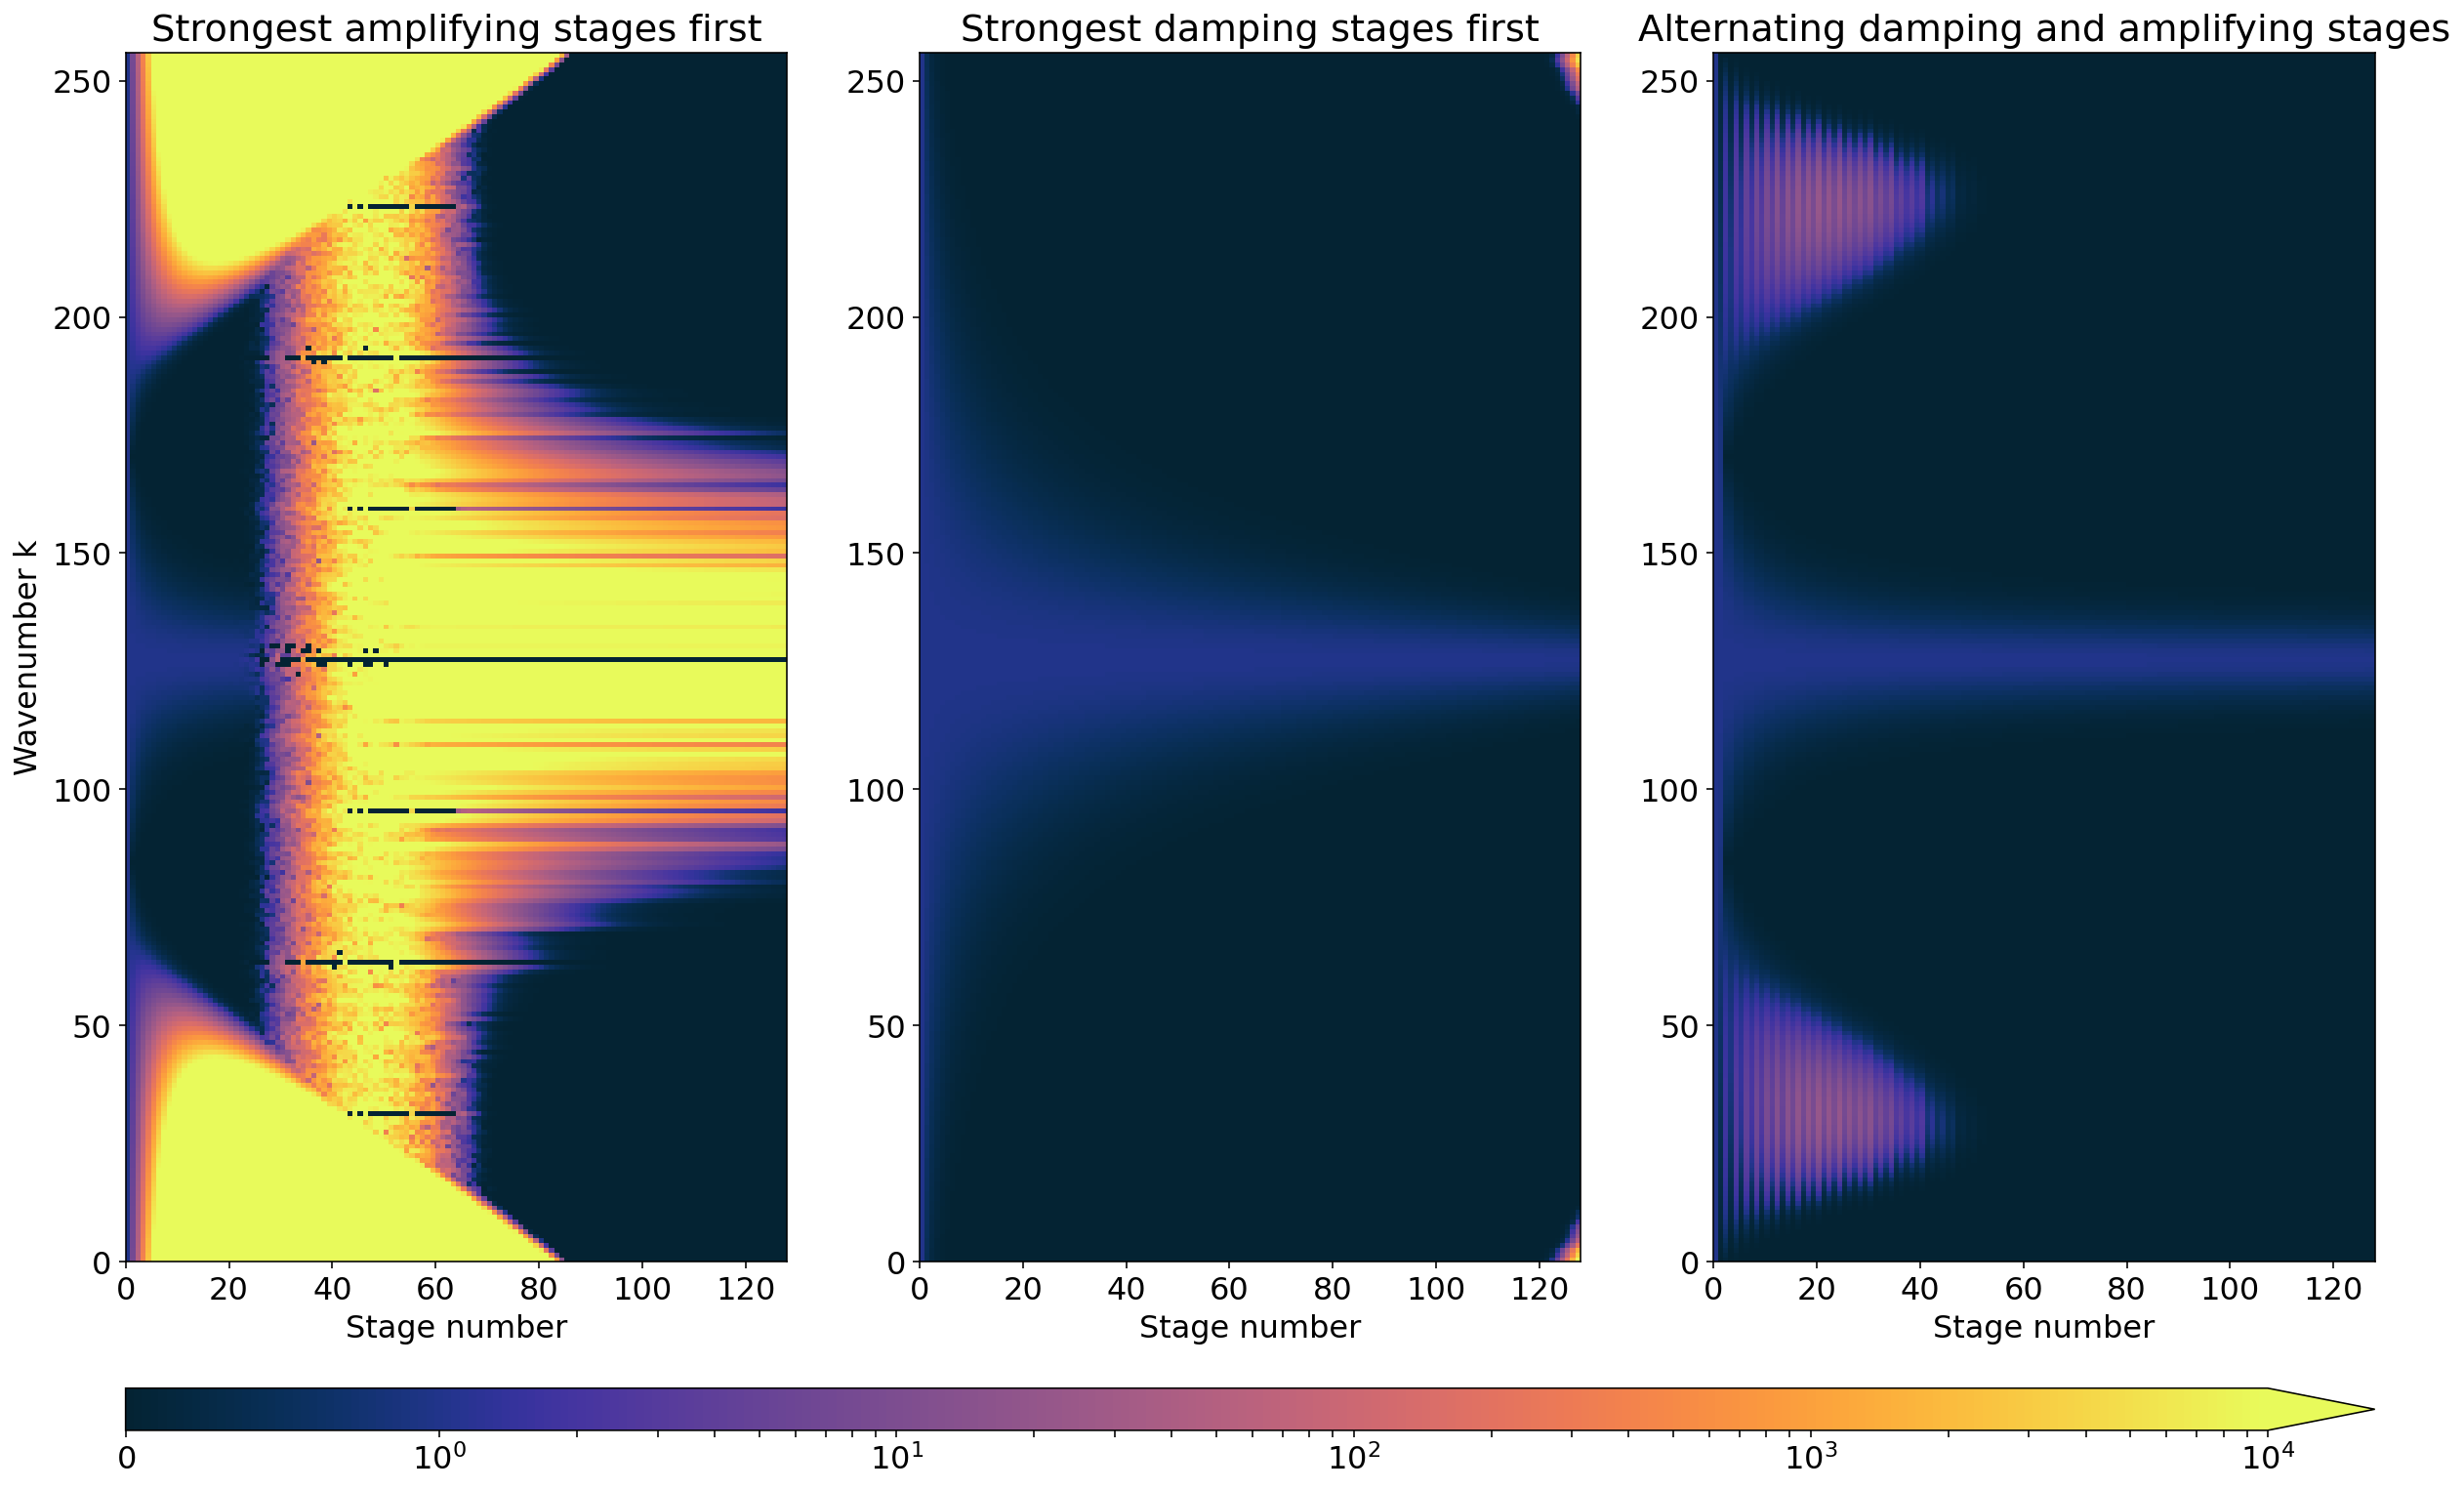

In [55]:
import matplotlib as mpl
import matplotlib.pylab as pylab
params = {'font.size': 16}
pylab.rcParams.update(params)
import cmocean
cmap = cmocean.cm.thermal
#cmap = 'cubehelix'
vmax = 1e4

fig, axarr = plt.subplots(ncols=3, nrows=1, figsize=[20,10])

im0 = axarr[0].pcolormesh(fIncreasing, cmap=cmap, norm=mpl.colors.SymLogNorm(linthresh=1), vmax=vmax)
axarr[0].set_xlabel('Stage number')
axarr[0].set_ylabel('Wavenumber k')
axarr[0].set_title('Strongest amplifying stages first')

im1 = axarr[1].pcolormesh(fDecreasing, cmap=cmap, norm=mpl.colors.SymLogNorm(linthresh=1), vmax=vmax)
axarr[1].set_xlabel('Stage number')
#axarr[1].set_ylabel('Wavenumber k')
axarr[1].set_title('Strongest damping stages first')

im2 = axarr[2].pcolormesh(fAlternating, cmap=cmap, norm=mpl.colors.SymLogNorm(linthresh=1), vmax=vmax)
axarr[2].set_xlabel('Stage number')
#axarr[2].set_ylabel('Wavenumber k')
axarr[2].set_title('Alternating damping and amplifying stages')

# colorbar
fig.subplots_adjust(left=0.1, bottom=0.02)
cax = fig.add_axes([0.1, -0.1, 0.8, 0.03])
cbar = fig.colorbar(im0, cax=cax, orientation='horizontal',extend='max')

#plt.savefig('figures/instability_thermal.png',dpi=400,bbox_inches='tight',pad_inches=0)

/glade/u/apps/dav/opt/python/3.7.9/gnu/9.1.0/pkg-library/20201220/lib/python3.7/site-packages/ipykernel_launcher.py:10: MatplotlibDeprecationWarning: default base will change from np.e to 10 in 3.4.  To suppress this warning specify the base keyword argument.
  # Remove the CWD from sys.path while we load stuff.
/glade/u/apps/dav/opt/python/3.7.9/gnu/9.1.0/pkg-library/20201220/lib/python3.7/site-packages/ipykernel_launcher.py:10: MatplotlibDeprecationWarning: Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.
  # Remove the CWD from sys.path while we load stuff.
/glade/u/apps/dav/opt/python/3.7.9/gnu/9.1.0/pkg-library/20201220/lib/python3.7/site-packages/ipykernel_launcher.py:15: MatplotlibDeprecationWarning: default base will change from np.e to 10 in 3.4.  To suppress this warning specify the base keyword argument.
  from ipykernel import kernelapp

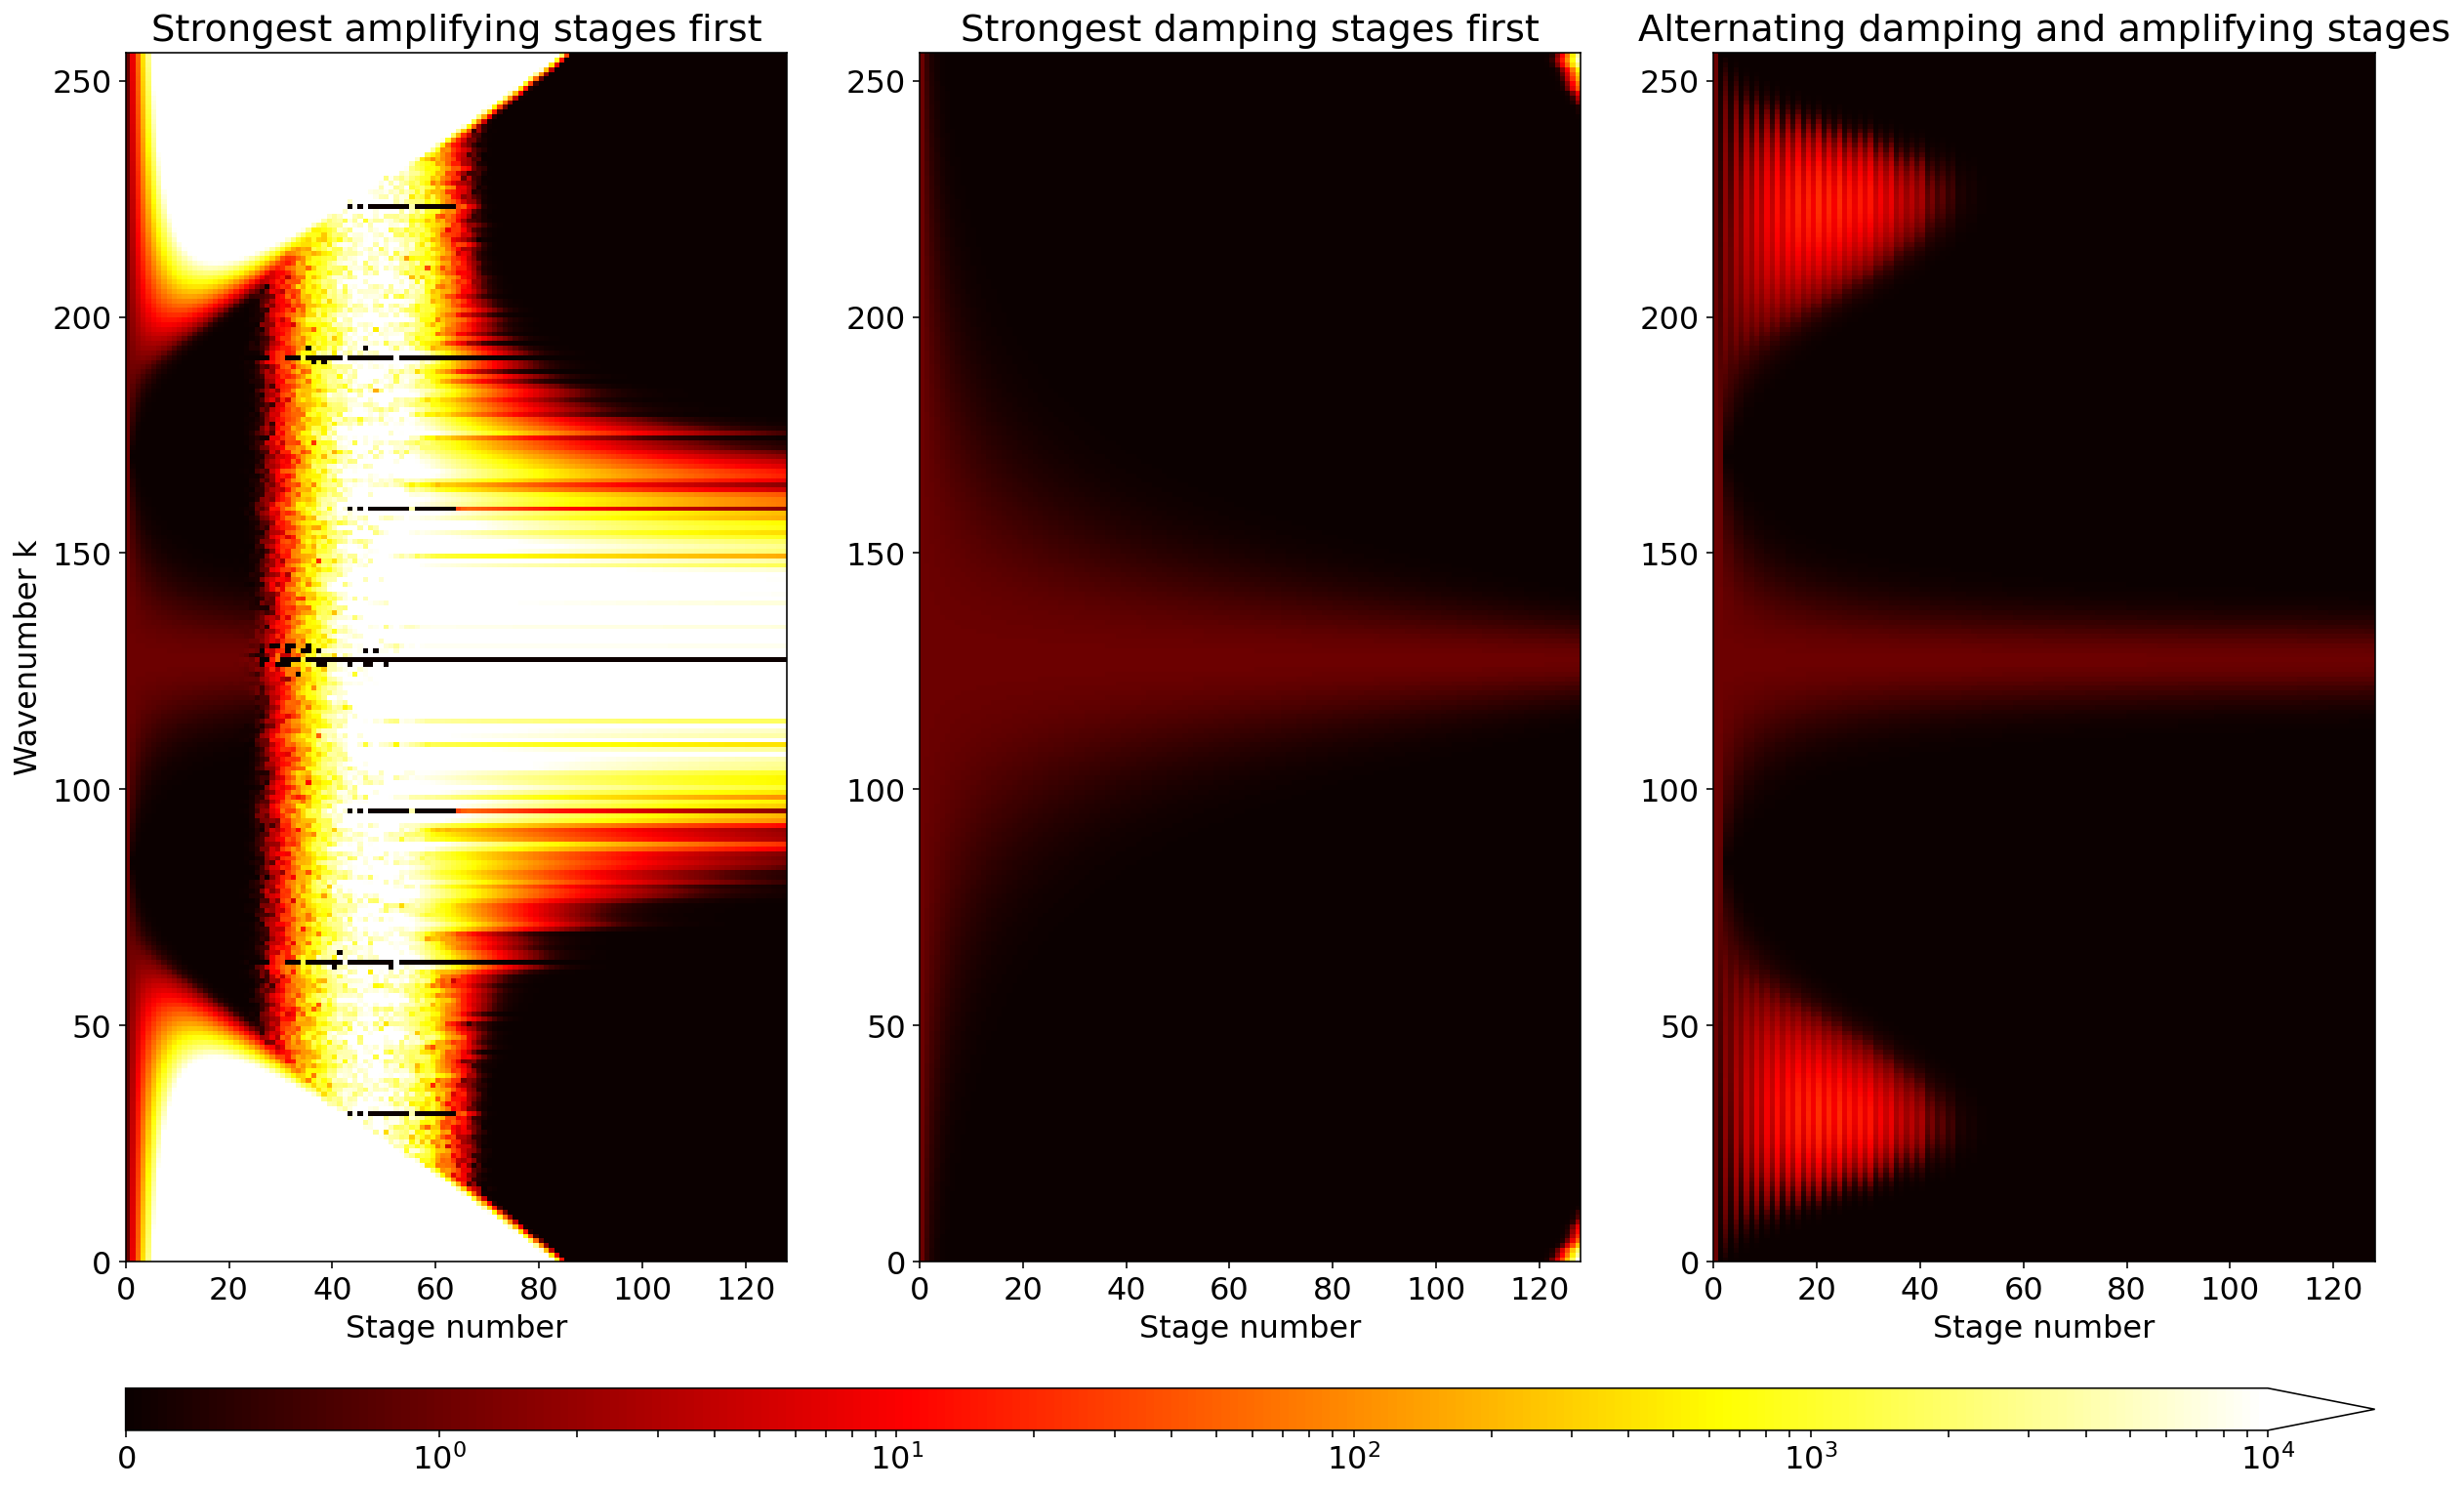

In [58]:
import matplotlib as mpl
import matplotlib.pylab as pylab
params = {'font.size': 16}
pylab.rcParams.update(params)
cmap = 'hot'
vmax = 1e4

fig, axarr = plt.subplots(ncols=3, nrows=1, figsize=[20,10])

im0 = axarr[0].pcolormesh(fIncreasing, cmap=cmap, norm=mpl.colors.SymLogNorm(linthresh=1), vmax=vmax)
axarr[0].set_xlabel('Stage number')
axarr[0].set_ylabel('Wavenumber k')
axarr[0].set_title('Strongest amplifying stages first')

im1 = axarr[1].pcolormesh(fDecreasing, cmap=cmap, norm=mpl.colors.SymLogNorm(linthresh=1), vmax=vmax)
axarr[1].set_xlabel('Stage number')
#axarr[1].set_ylabel('Wavenumber k')
axarr[1].set_title('Strongest damping stages first')

im2 = axarr[2].pcolormesh(fAlternating, cmap=cmap, norm=mpl.colors.SymLogNorm(linthresh=1), vmax=vmax)
axarr[2].set_xlabel('Stage number')
#axarr[2].set_ylabel('Wavenumber k')
axarr[2].set_title('Alternating damping and amplifying stages')

# colorbar
fig.subplots_adjust(left=0.1, bottom=0.02)
cax = fig.add_axes([0.1, -0.1, 0.8, 0.03])
cbar = fig.colorbar(im0, cax=cax, orientation='horizontal',extend='max')

#plt.savefig('figures/instability_hot.png',dpi=400,bbox_inches='tight',pad_inches=0)

In [5]:
print(np.max(fIncreasing))
print(np.max(fDecreasing))
print(np.max(fAlternating))

1.1955606896819375e+21
12324.640399432235
21.81403583640539
